In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
frames_path = '/Users/rai00007/Desktop/computer_vision/output/v2f/'

<ipython-input-3-b6878364b629>:46: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(resize_jpeg_and_return_binary(os.path.join(frames_path, "0.jpg"), 252), np.uint8)


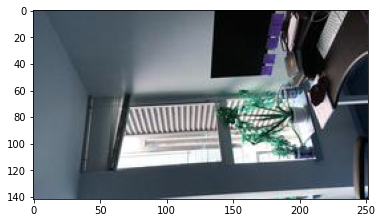

In [3]:
# Resize the image
"""This function reads a raw image, resizes it with aspect ratio preservation 
and returns the byte string"""
from PIL import Image
import numpy as np
import io



def resize_jpeg_and_return_binary(image,  max_side):
    """ Take Raw JPEG resize with aspect ratio preservation
         and return bytes
    """
    img = Image.open(image)
    img.thumbnail([max_side, max_side], Image.ANTIALIAS)
    b = io.BytesIO()
    img.save(b, 'JPEG')
    image_bytes = b.getvalue()
    return image_bytes


def decode_binary(binary_of_image):
    """This function takes in the image bytes and comverts it into 
    RGB"""
    nparr = np.fromstring(binary_of_image, np.uint8)
    frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return frame
    


def resize_image(image_path, newsize=(300,300)):
    # Opens a image in RGB mode 
    im = Image.open(image_path) 

    # Size of the image in pixels (size of orginal image) 
    # (This is not mandatory) 
    width, height = im.size 

    newsize = (300, 300) 
    im1 = im.resize(newsize)
    return im1
#     cv2.imwrite(image_path, im1)



nparr = np.fromstring(resize_jpeg_and_return_binary(os.path.join(frames_path, "0.jpg"), 252), np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
plt.imshow(img_np)

In [4]:
img_list = glob.glob(frames_path+'*')
img_names = list(map(lambda v: v.split('/')[-1].split('.')[0], img_list))
print(img_names)

['200', '60', '160', '100', '300', '260', '120', '280', '20', '240', '320', '180', '220', '80', '140', '40', '0']


In [34]:
def get_hist_of_pixel_brightness(frame):
    # frame = cv2.imread(os.path.join(frames_path, "0.jpg"))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    # # hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # # gray = hsv[:, :, 2]
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    return hist

In [35]:
def plot_hist_of_pixel_with_original_image(hist, frame):
    fig, (ax1, ax2) = plt.subplots(figsize=(16, 7), ncols=2)
    ax1.set_title("Grayscale Histogram")
    ax1.set_xlabel("Bins")
    ax1.set_ylabel("# of Pixels")
    ax1.plot(hist)
    ax1.set_xlim([0, 256])
    
    ax2.imshow(frame)

<ipython-input-3-b6878364b629>:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(binary_of_image, np.uint8)


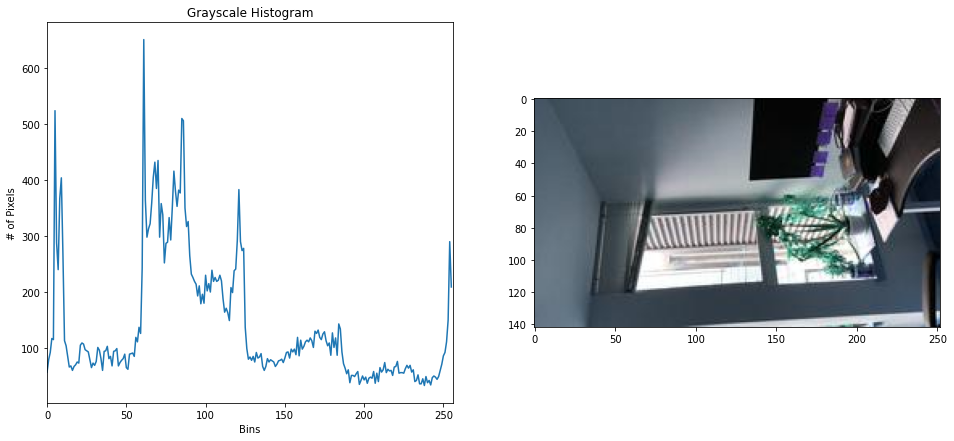

In [36]:
image_hist = {}

for i in img_names:
    # CV2
    resized_binary_of_image = resize_jpeg_and_return_binary(os.path.join(frames_path, "{}.jpg".format(i)), 252)
    frame = decode_binary(resized_binary_of_image)

    hist = get_hist_of_pixel_brightness(frame)
    image_hist[i] = hist

plot_hist_of_pixel_with_original_image(hist, frame)

PCA to visualize if there are separate groups in 2/3 dimensions

Clustering

In [8]:
import pandas as pd

from sklearn.cluster import KMeans

In [21]:
for k, v in image_hist.items():
    image_hist[k] = [int(vi) for vi in v]

In [24]:
X = pd.DataFrame(image_hist)

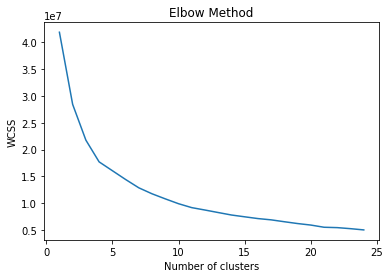

In [37]:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
bright_thres = 0.5
dark_thres = 0.4
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
dark_part = cv2.inRange(gray, 0, 60)
bright_part = cv2.inRange(gray, 220, 255)
# use histogram
# dark_pixel = np.sum(hist[:60])
# bright_pixel = np.sum(hist[220:256])
total_pixel = np.size(gray)
dark_pixel = np.sum(dark_part > 0)
bright_pixel = np.sum(bright_part > 0)
if dark_pixel/total_pixel > bright_thres:
    print("Face is underexposed!")
if bright_pixel/total_pixel > dark_thres:
    print("Face is overexposed!")